<span style="font-family: 'Times New Roman'; font-size: 20px; display: block;">Car Price Prediction using 
Random Forest Regressor</span>
<span style="font-family: 'Times New Roman'; font-size: 20px;">    Project Overview </span>
<p>The aim of this Data Science Project to focuses on building a machine learning model to predict car price for a company in Poland. Identifying car price by their model, generation, year of production, mileage, localization, and type and volume of engine.</p>


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

<pre><b style='font-size:20px'>• Variables:</b>
<b>Price:</b> Price variable shows the cost of car in Poland currency PLN (approx. 1USD=1PLN)
<b>Unnamed: 0:</b>  It represent the serial number.
<b>mark:</b>  Mark of the car.
<b> model:</b> Model of the car.
<b>generation_name:</b> Formatted Generation Name of the car.
<b> year:</b> Car Year of formatted.
<b>mileage:</b> Car Mileage in Kilometres.
<b> vol_engine:</b> Auto Engine Size.
<b> fuel:</b> Represent Engine Type according to their fuel type.
<b> city:</b> Locality in Poland.
<b>province:</b>  Region of Poland.
</pre>

In [2]:
df = pd.read_csv("Car_Prices.csv")
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


<b style="font-family: 'Times New Roman'; font-size: 20px; display: block;">drop irralivant feature</b>

In [3]:

df.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.0+ MB


<b style="font-family: 'Times New Roman'; font-size: 20px; display: block;">drop all the null and duplicated values</b>

In [5]:

df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

5046

In [7]:
#drop all the duplicatted values
df.drop_duplicates(inplace=True)

In [8]:

df.describe().astype(int)

,year,mileage,vol_engine,price
count,82796,82796,82796,82796
mean,2012,152751,1842,62598
std,5,89996,613,75624
min,1978,0,0,900
25%,2008,86338,1498,19900
50%,2012,158700,1798,37900
75%,2017,212316,1995,73850
max,2022,2500000,6600,2399900


In [9]:
#for numaric colmuns
colmuns = df.select_dtypes(include='number')

In [10]:
colmuns

,year,mileage,vol_engine,price
0,2015,139568,1248,35900
1,2018,31991,1499,78501
2,2015,278437,1598,27000
3,2016,47600,1248,30800
4,2014,103000,1400,35900
...,...,...,...,...
117250,2017,51000,1969,229900
117251,2016,83500,1969,135000
117252,2017,174000,1969,154500
117253,2016,189020,1969,130000


In [11]:
import seaborn as sns 

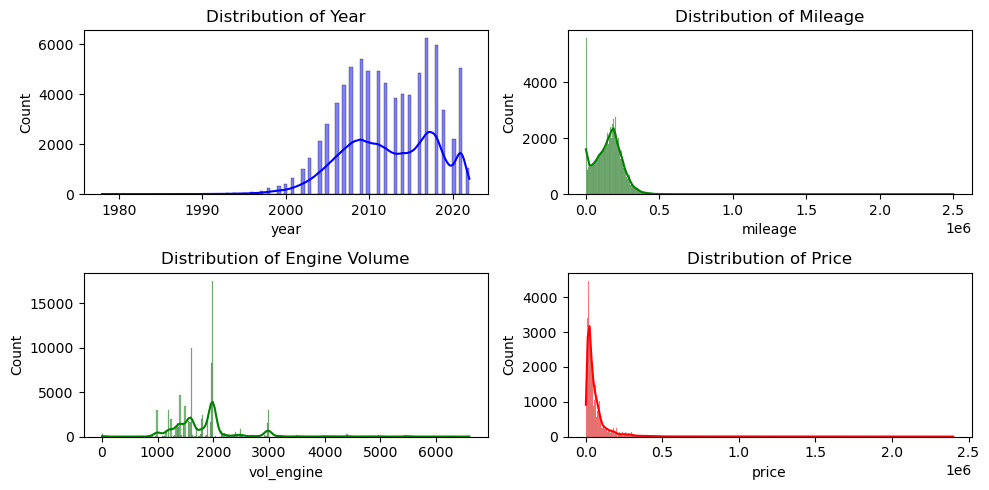

In [12]:
fig, axes= plt.subplots(2,2, figsize=(10,5))

sns.histplot(data=df, x='year', kde=True, color="blue", edgecolor="black",ax=axes[0,0])
axes[0, 0].set_title('Distribution of Year')


sns.histplot(data=df, x='mileage', kde=True, color="green", edgecolor="black",ax=axes[0,1]) 
axes[0, 1].set_title('Distribution of Mileage')


sns.histplot(data=df, x='vol_engine', kde=True, color="green", edgecolor="black",ax=axes[1,0])
axes[1, 0].set_title('Distribution of Engine Volume')


sns.histplot(data=df, x='price', kde=True, color="red", edgecolor="black",ax=axes[1,1])
axes[1, 1].set_title('Distribution of Price')


plt.tight_layout()

plt.show()

In [13]:
def remove_outliers(df, column):
   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    num_outliers = len(df) - len(df_filtered)
    print(f"\n--- Outlier Removal Summary for '{column}' ---")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Original rows: {len(df)}, Filtered rows: {len(df_filtered)}")
    print(f"Number of outliers removed: {num_outliers}")

    return df_filtered

In [14]:
for col in colmuns: 
    df=remove_outliers(df, col)


--- Outlier Removal Summary for 'year' ---
Q1: 2008.00, Q3: 2017.00, IQR: 9.00
Lower Bound: 1994.50, Upper Bound: 2030.50
Original rows: 82796, Filtered rows: 82645
Number of outliers removed: 151

--- Outlier Removal Summary for 'mileage' ---
Q1: 86180.00, Q3: 212021.00, IQR: 125841.00
Lower Bound: -102581.50, Upper Bound: 400782.50
Original rows: 82645, Filtered rows: 82228
Number of outliers removed: 417

--- Outlier Removal Summary for 'vol_engine' ---
Q1: 1498.00, Q3: 1995.00, IQR: 497.00
Lower Bound: 752.50, Upper Bound: 2740.50
Original rows: 82228, Filtered rows: 75046
Number of outliers removed: 7182

--- Outlier Removal Summary for 'price' ---
Q1: 19500.00, Q3: 68899.00, IQR: 49399.00
Lower Bound: -54598.50, Upper Bound: 142997.50
Original rows: 75046, Filtered rows: 69488
Number of outliers removed: 5558


<b style="font-family: 'Times New Roman'; font-size: 20px; display: block;">After removed the outlier</b>

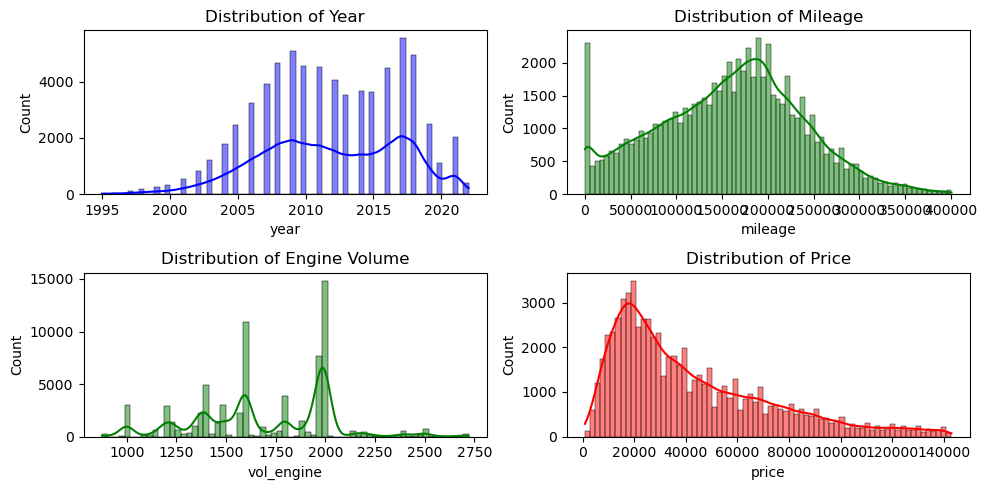

In [15]:
fig, axes= plt.subplots(2,2, figsize=(10,5))

sns.histplot(data=df, x='year', kde=True, color="blue", edgecolor="black",ax=axes[0,0])
axes[0, 0].set_title('Distribution of Year')


sns.histplot(data=df, x='mileage', kde=True, color="green", edgecolor="black",ax=axes[0,1]) 
axes[0, 1].set_title('Distribution of Mileage')


sns.histplot(data=df, x='vol_engine', kde=True, color="green", edgecolor="black",ax=axes[1,0])
axes[1, 0].set_title('Distribution of Engine Volume')


sns.histplot(data=df, x='price', kde=True, color="red", edgecolor="black",ax=axes[1,1])
axes[1, 1].set_title('Distribution of Price')


plt.tight_layout()

plt.show()

In [16]:
df.describe()

,year,mileage,vol_engine,price
count,69488.000000,69488.000000,69488.000000,69488.000000
mean,2011.855961,159203.062716,1686.756131,42062.148788
std,5.141381,79948.075522,337.784631,30519.505297
min,1995.000000,1.000000,875.000000,900.000000
25%,2008.000000,102392.500000,1399.000000,18800.000000
50%,2012.000000,165000.000000,1598.000000,32900.000000
75%,2016.000000,212900.000000,1984.000000,59600.000000
max,2022.000000,400500.000000,2720.000000,142990.000000


In [17]:
# to getting text carring colmuns
text_columns = df.select_dtypes(include='object')

In [18]:
text_columns

,mark,model,generation_name,fuel,city,province
0,opel,combo,gen-d-2011,Diesel,Janki,Mazowieckie
1,opel,combo,gen-d-2011,Diesel,Katowice,Śląskie
2,opel,combo,gen-d-2011,Diesel,Brzeg,Opolskie
3,opel,combo,gen-d-2011,Diesel,Korfantów,Opolskie
4,opel,combo,gen-d-2011,CNG,Tarnowskie Góry,Śląskie
...,...,...,...,...,...,...
117230,volvo,xc-90,gen-ii-2014-xc-90,Diesel,Wrocław,Dolnośląskie
117237,volvo,xc-90,gen-ii-2014-xc-90,Gasoline,Warszawa,Mazowieckie
117251,volvo,xc-90,gen-ii-2014-xc-90,Gasoline,Pruszcz Gdański,Pomorskie
117253,volvo,xc-90,gen-ii-2014-xc-90,Gasoline,Sionna,Mazowieckie


<b style="font-family: 'Times New Roman'; font-size: 20px; display: block;"> To know the Quantity of objects feature</b>

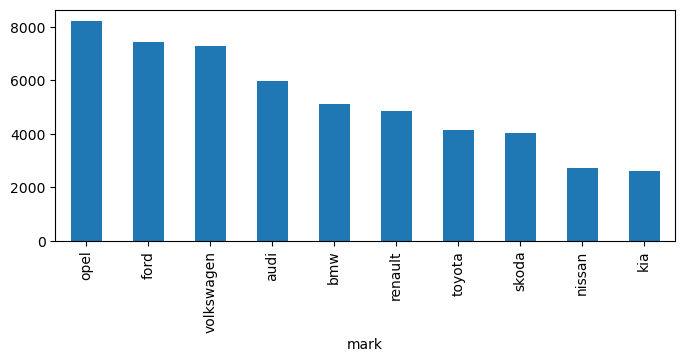

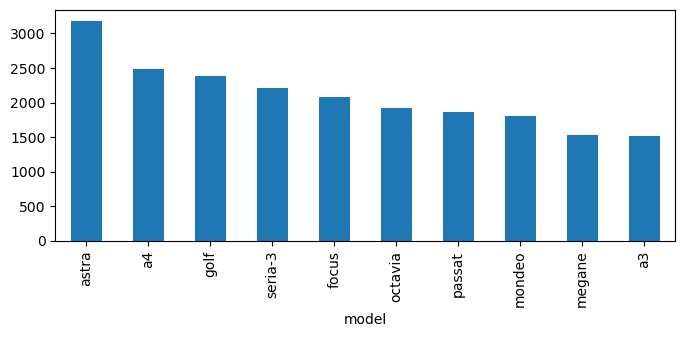

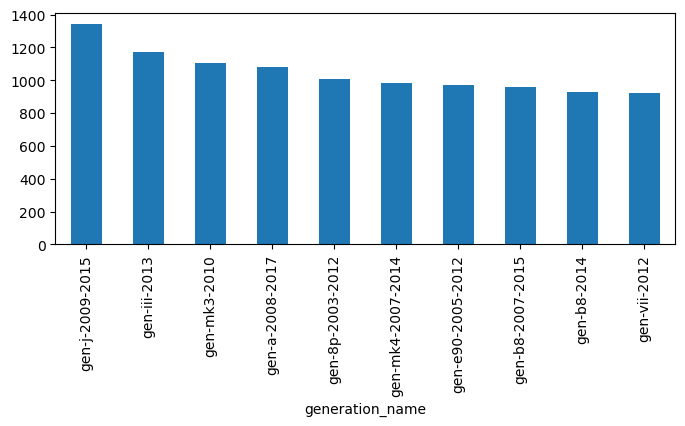

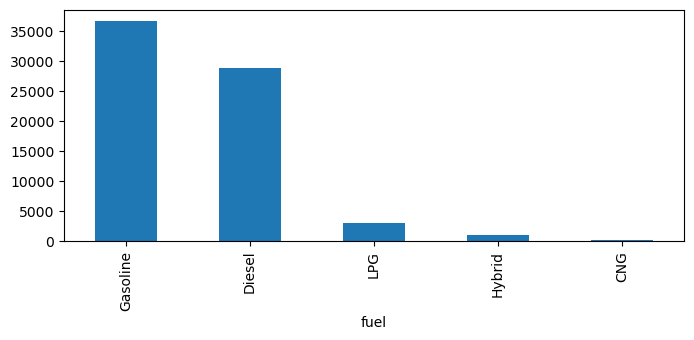

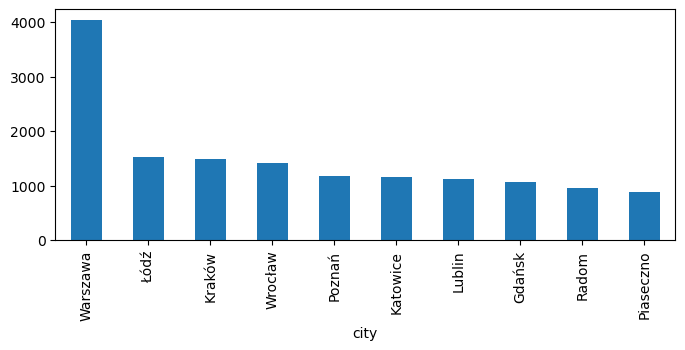

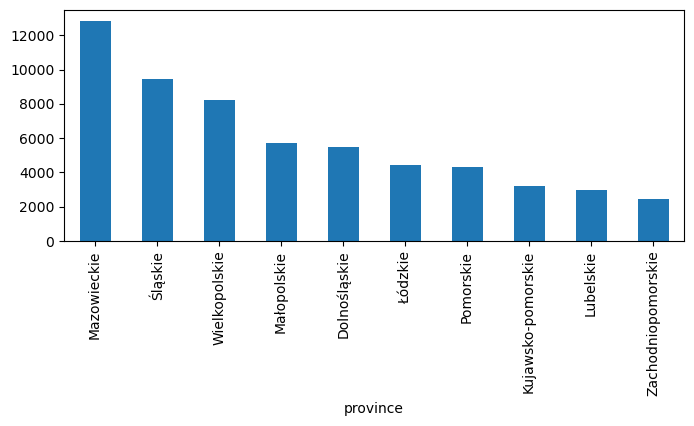

In [128]:
for col in text_columns:
    plt.figure(figsize = (8,3))
    df[col].value_counts(ascending=False).head(10).plot(kind="bar")
    plt.show()

<b style="font-family: 'Times New Roman'; font-size: 20px; display: block;"> To check the relation of features with the price</b>

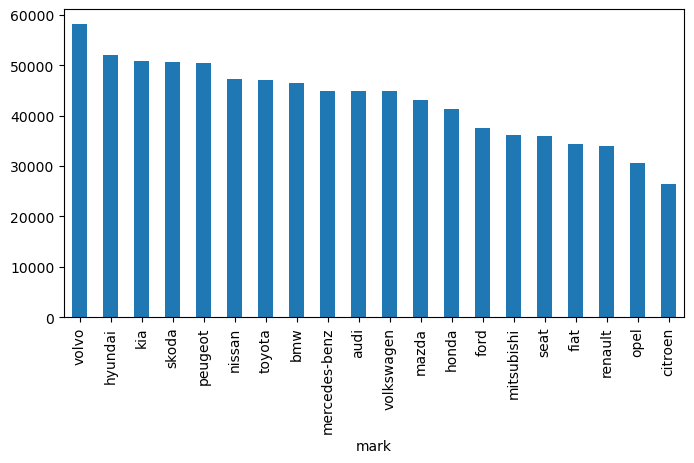

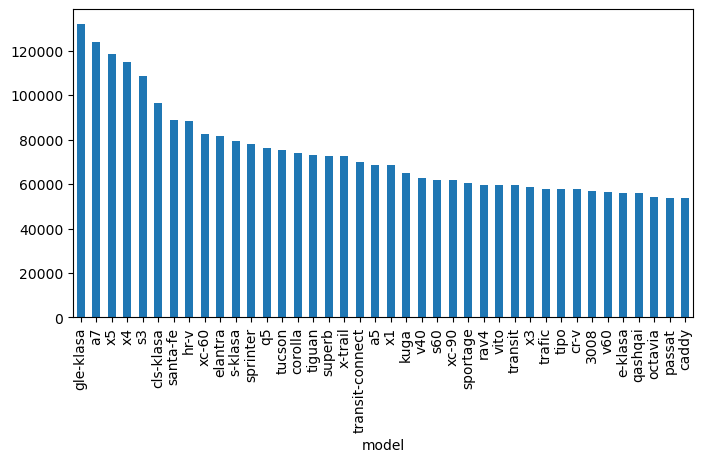

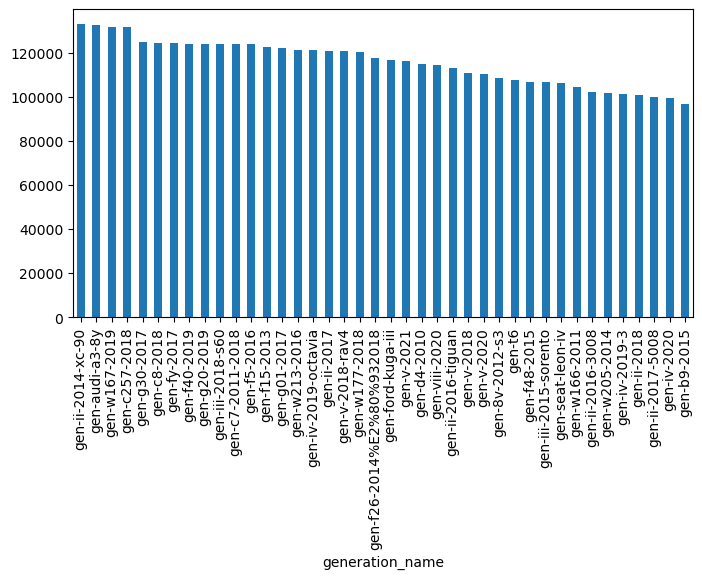

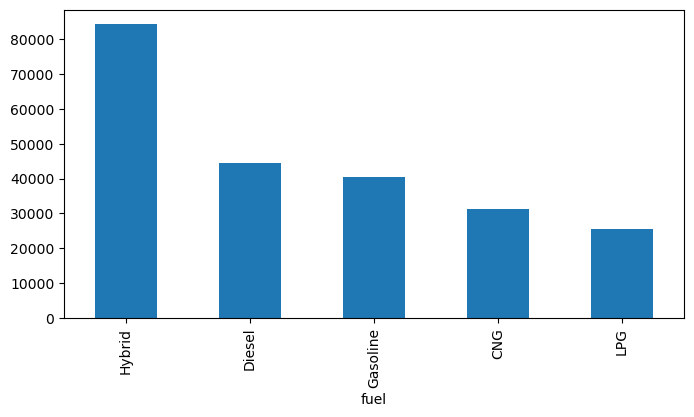

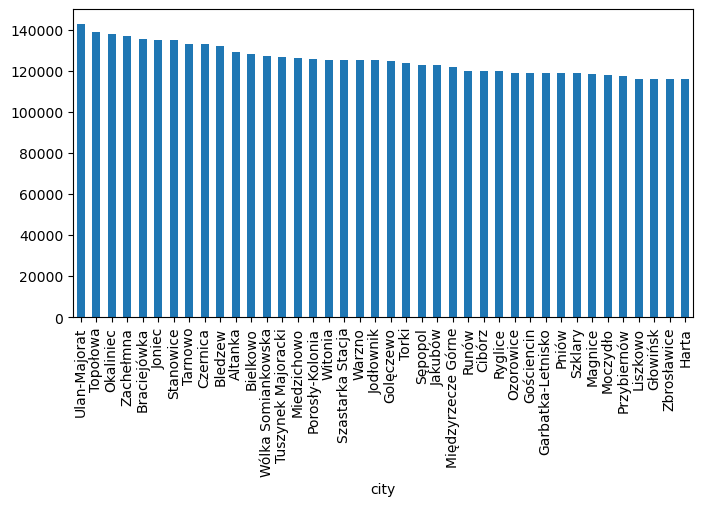

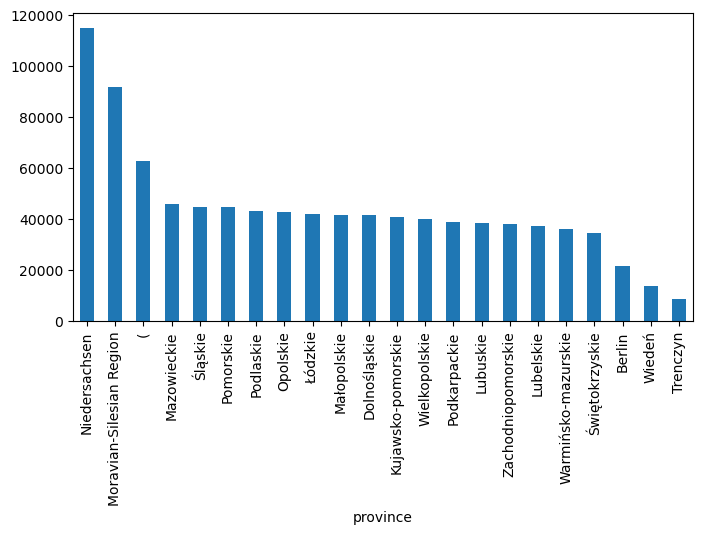

In [129]:

for col in text_columns:
    plt.figure(figsize = (8,4))
    df.groupby(col)["price"].mean().sort_values(ascending=False).head(40).plot(kind="bar")
    plt.show()

In [130]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
le = LabelEncoder()

<b style="font-family: 'Times New Roman'; font-size: 20px; display: block;">to assign the numeric values to text columns</b>

In [131]:

for col in df.select_dtypes(include="object"):
    df[col] = le.fit_transform(df[col])

In [132]:
df.corr()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
mark,1.000000,0.196819,0.246185,0.121745,-0.117552,-0.227961,0.052916,0.005299,0.001786,0.022738
model,0.196819,1.000000,-0.083408,0.071234,-0.018935,0.064960,-0.076213,-0.004996,-0.001162,0.123390
generation_name,0.246185,-0.083408,1.000000,0.240800,-0.239778,-0.253888,0.073241,0.007266,0.019613,0.100035
year,0.121745,0.071234,0.240800,1.000000,-0.671815,-0.250313,-0.077639,0.018455,0.004956,0.796587
mileage,-0.117552,-0.018935,-0.239778,-0.671815,1.000000,0.427870,-0.198991,-0.020707,-0.025703,-0.590134
vol_engine,-0.227961,0.064960,-0.253888,-0.250313,0.427870,1.000000,-0.300485,0.003427,-0.040087,0.077804
fuel,0.052916,-0.076213,0.073241,-0.077639,-0.198991,-0.300485,1.000000,0.008100,0.007001,-0.083026
city,0.005299,-0.004996,0.007266,0.018455,-0.020707,0.003427,0.008100,1.000000,-0.070049,0.026105
province,0.001786,-0.001162,0.019613,0.004956,-0.025703,-0.040087,0.007001,-0.070049,1.000000,-0.012935
price,0.022738,0.123390,0.100035,0.796587,-0.590134,0.077804,-0.083026,0.026105,-0.012935,1.000000


In [133]:
df.columns

Index(['mark', 'model', 'generation_name', 'year', 'mileage', 'vol_engine',
       'fuel', 'city', 'province', 'price'],
      dtype='object')

<b style="font-family: 'Times New Roman'; font-size: 20px; display: block;">select features for training the models</b>

In [134]:

x = df[['mark','model','generation_name','year','mileage','vol_engine','fuel']]
y = df['price']

In [135]:
#convert the values in the standard form
x = scaler.fit_transform(x)

In [136]:
from sklearn.model_selection import train_test_split,GridSearchCV 

In [137]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [138]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

In [139]:
# write the function for predicting the result easily
def result(predict):
    print(f"mean_absolute_error is { mean_absolute_error(y_test,predict)}")
    print(f"mean_squared_error is { np.sqrt(mean_squared_error(y_test,predict))}")
    print(f"r2_score is {r2_score(y_test,predict)}")
    print(f"{mean_absolute_percentage_error(y_test,predict)}")
    

In [140]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [141]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [142]:
dtr_pred = dtr.predict(x_test)

In [143]:
result(dtr_pred)

mean_absolute_error is 6349.8935625805
mean_squared_error is 10303.527483857199
r2_score is 0.883536882477968
0.18629390851940947


In [144]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [145]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [146]:
knr_pred = knr.predict(x_test)

In [147]:
result(knr_pred)

mean_absolute_error is 5352.348457287589
mean_squared_error is 8463.709915392914
r2_score is 0.9214152848250615
0.15901738520827738


In [148]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [149]:
grid_rfr = {
        
     'random_state': [None, 42],
    'n_estimators': [100,110,120],
}

In [150]:
gsv=GridSearchCV(rfr,grid_rfr, cv=5)

In [151]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 110, 120],
                         'random_state': [None, 42]})

In [152]:
grid_rfr_pred =gsv.predict(x_test)

In [153]:
result(grid_rfr_pred)

mean_absolute_error is 5040.714346060589
mean_squared_error is 8040.00448751887
r2_score is 0.9290864665432411
0.1485926172699571


In [154]:
gsv.best_params_

{'n_estimators': 120, 'random_state': 42}

In [155]:
import joblib

In [156]:
joblib.dump(scaler,"scaler")


['scaler']

In [157]:
joblib.dump(gsv,"rfr car price predictor model.pkl")

['rfr car price predictor model.pkl']